# Prise en main des bibliothèques de Machine Learning.

<br/>

##### Arnaud Deleruyelle : Doctorant SIGMA - BioComputing
##### Encadrement: John Klein (SIGMA) - Cristian Versari (BioComputing)

## Partie 1 : Keras

### Section 1.1: Imports

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


### Section 1.2: Data

In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Section 1.3: Variables Globales

In [3]:
batch_size = 1000
epochs = 40

### Section 1.4: Model

In [4]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Section 1.5: Fit

In [5]:
%%time

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 23us/step - loss: 1.3317 - acc: 0.6408 - val_loss: 0.5447 - val_acc: 0.8575
Epoch 2/40
60000/60000 [==============================] - 1s 21us/step - loss: 0.4133 - acc: 0.8866 - val_loss: 0.3234 - val_acc: 0.9092
Epoch 3/40
60000/60000 [==============================] - 1s 22us/step - loss: 0.3047 - acc: 0.9124 - val_loss: 0.2767 - val_acc: 0.9172
Epoch 4/40
60000/60000 [==============================] - 1s 22us/step - loss: 0.2662 - acc: 0.9217 - val_loss: 0.2493 - val_acc: 0.9263
Epoch 5/40
60000/60000 [==============================] - 1s 23us/step - loss: 0.2376 - acc: 0.9310 - val_loss: 0.2242 - val_acc: 0.9347
Epoch 6/40
60000/60000 [==============================] - 1s 22us/step - loss: 0.2151 - acc: 0.9377 - val_loss: 0.2065 - val_acc: 0.9384
Epoch 7/40
60000/60000 [==============================] - 1s 22us/step - loss: 0.1952 - acc: 0.9430 - val_loss: 0.1905 - val_acc

#### Section 1.6: Predict

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06607306100567803
Test accuracy: 0.9807


## Partie 2: Tensorflow

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from IPython.core.display import Image, display

def weight_variable(shape):
    initial = tf.truncated_normal([int(shape[0]),shape[1]], stddev=0.1)
    return tf.Variable(initial, dtype = tf.float32)
 
# The constant value 0.1
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, dtype = tf.float32)

def MLP(x_b,tab_neurones, tab_activation, dropout = 1, name="MLP"):
    with tf.name_scope(name):
        outs = []
        for i in range(len(tab_neurones)):
            if i == 0 :
                input_nb_neurone = x_b.shape[1]
                input_data = x_b
            else:
                input_nb_neurone = tab_neurones[i-1]
                input_data = outs[i-1]
            W = weight_variable([input_nb_neurone, tab_neurones[i]])
            b = bias_variable([tab_neurones[i]])
            if (tab_activation[i] == "relu"):
                out = tf.nn.relu(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "sigmoid"):
                out = tf.nn.sigmoid(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "tanh"):
                out = tf.tanh(tf.matmul(input_data, W) + b)
            elif (tab_activation[i] == "softmax"):
                out = tf.nn.softmax(tf.matmul(input_data, W) + b)
            else:
                out = tf.matmul(input_data, W) + b
            # gestion du dropout
            if (dropout != 1) & (i != len(tab_neurones)-1):
                out_drop = tf.nn.dropout(out, dropout)
                outs.append(out_drop)
            else:
                outs.append(out)
        return outs



def Fit(x_train,x_test,y_train,y_test,model, verbose = 100):
    sess = tf.InteractiveSession()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    visualisation = []
    for epoch in range(epochs):
        indices = np.random.choice(x_train.shape[0], size=batch_size)
        x_b = x_train[indices]
        y_b = y_train[indices]
        feed_dict = {x_batch: x_b, y_batch: y_b}
        sess.run(model, feed_dict=feed_dict)
        if epoch%verbose ==0:
            feed_dict_train = {x_batch: x_train, y_batch: y_train}
            feed_dict_test = {x_batch: x_test, y_batch: y_test}
            loss_train = sess.run(avg_llh, feed_dict=feed_dict_train)
            loss_test = sess.run(avg_llh, feed_dict=feed_dict_test)
            print("Epoch: ", epoch)
            print("Loss train = ", loss_train)
            print("Loss test = ", loss_test)
            visualisation.append(np.array([epoch,loss_train,loss_test]))
    return (sess,np.array(visualisation))

    
def ES(x_train,x_test,y_train,y_test,model,n = 100, p = 10, verbose = 500):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    saver = tf.train.Saver()
    visualisation = []
    j = 0
    step = 0
    best_loss = np.inf
    while j < p:
        # train n steps
        for i in range(n):
            indices = np.random.choice(x_train.shape[0], size=batch_size)
            x_b = x_train[indices]
            y_b = y_train[indices]
            feed_dict = {x_batch: x_b, y_batch: y_b}
            sess.run(model, feed_dict=feed_dict)
            step = step+1
        # compute en print actual score
        feed_dict_train = {x_batch: x_train, y_batch: y_train}
        feed_dict_test = {x_batch: x_test, y_batch: y_test}
        loss_train = sess.run(avg_llh, feed_dict=feed_dict_train)
        loss_test = sess.run(avg_llh, feed_dict=feed_dict_test)
        print("Loss train = ", loss_train)
        print("Loss test = ", loss_test)
        visualisation.append(np.array([step,loss_train,loss_test]))
        #compare loss
        if loss_test < best_loss:
            save_path = saver.save(sess, "/tmp/best_model.ckpt")
            j = 0
            best_loss = loss_test
        else:
            j = j+1
    best_model = saver.restore(sess, "/tmp/best_model.ckpt")
    return (sess,np.array(visualisation))

def Predict(x_test,session):
    feed_dict = {x_batch: x_test}
    yh_vals = session.run((y_pred), feed_dict=feed_dict)
    return yh_vals

In [8]:
x_batch = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='x_batch')
y_batch = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='y_batch')
batch_size = 1000
epochs = 2400

mlp_mnist = MLP(x_batch,[512,512,10], ['sigmoid','sigmoid','identity'])

# output layer
y_pred = mlp_mnist[-1]

# loss function
loglikelihoods = tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels = y_batch)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001)

model_mnist = opt.minimize(avg_llh)

In [9]:
%%time

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# fit the model
fit_mnist,visu = Fit(x_train,x_test,y_train,y_test,model_mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch:  0
Loss train =  2.4836428
Loss test =  2.476776
Epoch:  100
Loss train =  0.34998226
Loss test =  0.34064135
Epoch:  200
Loss train =  0.2673925
Loss test =  0.26632664
Epoch:  300
Loss train =  0.22653224
Loss test =  0.2301376
Epoch:  400
Loss train =  0.19745883
Loss test =  0.20344149
Epo

0.9784


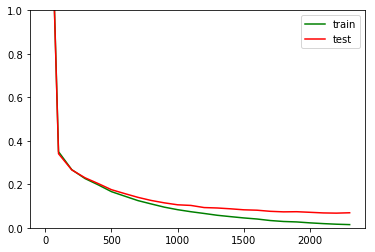

In [10]:
result_mnist = Predict(x_test,fit_mnist)

correct_prediction = np.equal(np.argmax(result_mnist, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct_prediction.astype(float))

print(accuracy)

# visualize error
error = np.hsplit(visu,3)
plt.plot(error[0],error[1], 'green', label='train')
plt.plot(error[0],error[2], 'red',label='test')
plt.axis(ymax=1,ymin = 0)
plt.legend()
plt.show()



In [11]:
# fit the model
ES_fit_mnist,visu = ES(x_train,x_test,y_train,y_test,model_mnist)

Loss train =  0.35603192
Loss test =  0.34459525
Loss train =  0.2683796
Loss test =  0.26538095
Loss train =  0.22746848
Loss test =  0.22933261
Loss train =  0.19384153
Loss test =  0.19916762
Loss train =  0.16632041
Loss test =  0.17503372
Loss train =  0.1474772
Loss test =  0.15813014
Loss train =  0.12497632
Loss test =  0.14027707
Loss train =  0.109395795
Loss test =  0.12591638
Loss train =  0.09771788
Loss test =  0.11574453
Loss train =  0.08439167
Loss test =  0.10772342
Loss train =  0.0732444
Loss test =  0.09890267
Loss train =  0.065997615
Loss test =  0.09440676
Loss train =  0.057022538
Loss test =  0.08998008
Loss train =  0.049941063
Loss test =  0.08333745
Loss train =  0.044276644
Loss test =  0.0808365
Loss train =  0.039236646
Loss test =  0.07785221
Loss train =  0.033493046
Loss test =  0.07388505
Loss train =  0.03009493
Loss test =  0.07198457
Loss train =  0.024996582
Loss test =  0.07064138
Loss train =  0.024925109
Loss test =  0.07256506
Loss train =  0

0.9802


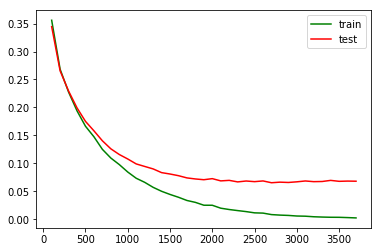

In [12]:
result_mnist = Predict(x_test,ES_fit_mnist)

correct_prediction = np.equal(np.argmax(result_mnist, 1), np.argmax(y_test, 1))
accuracy = np.mean(correct_prediction.astype(float))

print(accuracy)

# visualize error
error = np.hsplit(visu,3)
plt.plot(error[0],error[1], 'green', label='train')
plt.plot(error[0],error[2], 'red',label='test')
#plt.axis(ymax=1,ymin = 0)
plt.legend()
plt.show()

## Partie 3: PyTorch

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 1000,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

torch.Size([1000, 1, 28, 28])
    6     1     6     6     9     4     1     9


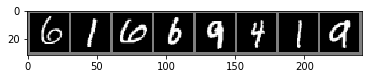

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images[:8]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
#        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 512)
#        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.sigmoid(self.fc1(x))
#        x = self.fc1_drop(x)
        x = torch.sigmoid(self.fc2(x))
#        x = self.fc2_drop(x)
        return F.log_softmax(self.fc3(x),dim = 1)


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


In [18]:
%%time

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')


[1,    10] loss: 2.252
[1,    20] loss: 1.883
[1,    30] loss: 1.332
[1,    40] loss: 0.903
[1,    50] loss: 0.681
[1,    60] loss: 0.535
[2,    10] loss: 0.466
[2,    20] loss: 0.410
[2,    30] loss: 0.378
[2,    40] loss: 0.352
[2,    50] loss: 0.334
[2,    60] loss: 0.325
[3,    10] loss: 0.302
[3,    20] loss: 0.295
[3,    30] loss: 0.293
[3,    40] loss: 0.278
[3,    50] loss: 0.282
[3,    60] loss: 0.259
[4,    10] loss: 0.250
[4,    20] loss: 0.250
[4,    30] loss: 0.232
[4,    40] loss: 0.241
[4,    50] loss: 0.233
[4,    60] loss: 0.216
[5,    10] loss: 0.203
[5,    20] loss: 0.201
[5,    30] loss: 0.208
[5,    40] loss: 0.186
[5,    50] loss: 0.192
[5,    60] loss: 0.195
[6,    10] loss: 0.193
[6,    20] loss: 0.173
[6,    30] loss: 0.174
[6,    40] loss: 0.168
[6,    50] loss: 0.158
[6,    60] loss: 0.144
[7,    10] loss: 0.147
[7,    20] loss: 0.150
[7,    30] loss: 0.143
[7,    40] loss: 0.142
[7,    50] loss: 0.145
[7,    60] loss: 0.139
[8,    10] loss: 0.133
[8,    20] 

GroundTruth:      7     2     1     0     4     1     4     9


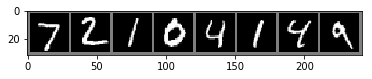

In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:8]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))


In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))


Predicted:      7     2     1     0     4     1     4     9


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %
